/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(154, 504, 504)


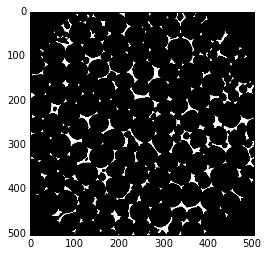

In [1]:
%matplotlib inline
from skimage.io import imread
import matplotlib.pyplot as plt
pt_image = imread('../data/plateau_border.tif')
print(pt_image.shape)
plt.imshow(pt_image[pt_image.shape[0]//2], cmap = 'bone')

# Curvature Demo in MayaVi 
The demo code was taken from Emmanuelle Gouillart's blog at http://emmanuelle.github.io/segmentation-of-3-d-tomography-images-with-python-and-scikit-image.html

In [ ]:
!../xvfb_bg start
import os
os.environ['DISPLAY'] = ':1' # use the xvfb backend
from mayavi import mlab
mlab.init_notebook(backend='png') 

In [ ]:
mlab.figure(bgcolor=(0, 0, 0))
s = mlab.pipeline.scalar_field(pt_image>0)
contour = mlab.pipeline.contour(s)
smooth = mlab.pipeline.user_defined(contour, filter='SmoothPolyDataFilter')
smooth.filter.number_of_iterations = 400
smooth.filter.relaxation_factor = 0.015
curv = mlab.pipeline.user_defined(smooth, filter='Curvatures')

surf = mlab.pipeline.surface(curv)
module_manager = curv.children[0]
module_manager.scalar_lut_manager.data_range = np.array([-0.6,  0.5])
module_manager.scalar_lut_manager.lut_mode = 'RdBu'
mlab.show()